Missing values summary:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64
Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     119 non-null    float64
 1   From Home       119 non-null    float64
 2   From Hashtags   119 non-null    float64
 3   From Explore    119 non-null    float64
 4   From Other      119 non-null    float64
 5   Saves           119 non-null    float64
 6   Comments        119 non-null    float64
 7   Shares          119 non-null    float64
 8   Likes           119 non-null    float64
 9   Profile Visits  119 non-null    float64
 10  Follows         119 non-null    flo

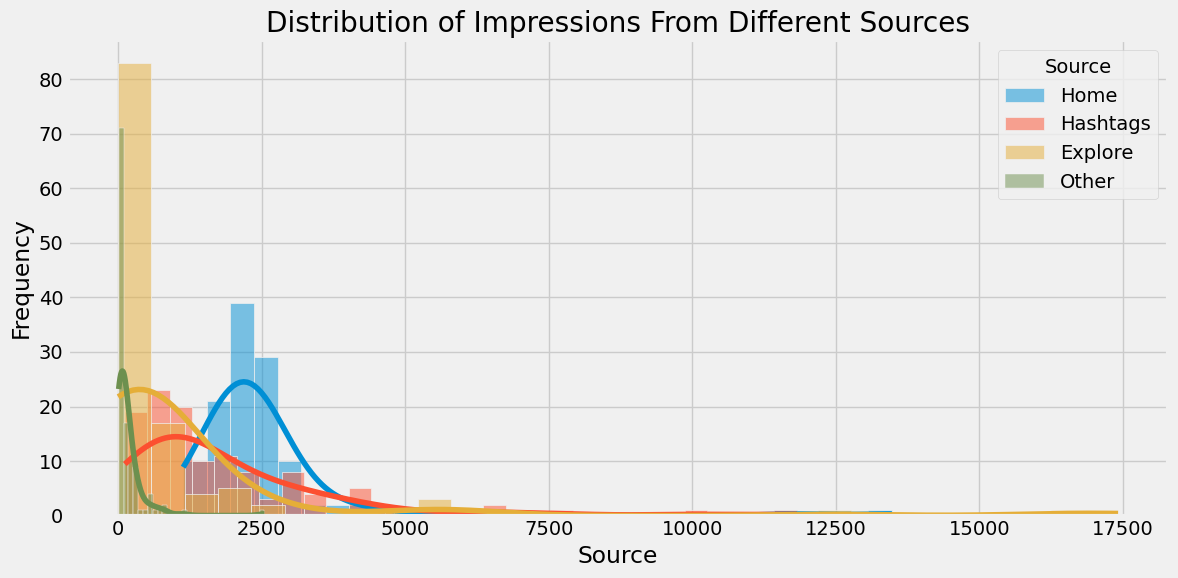

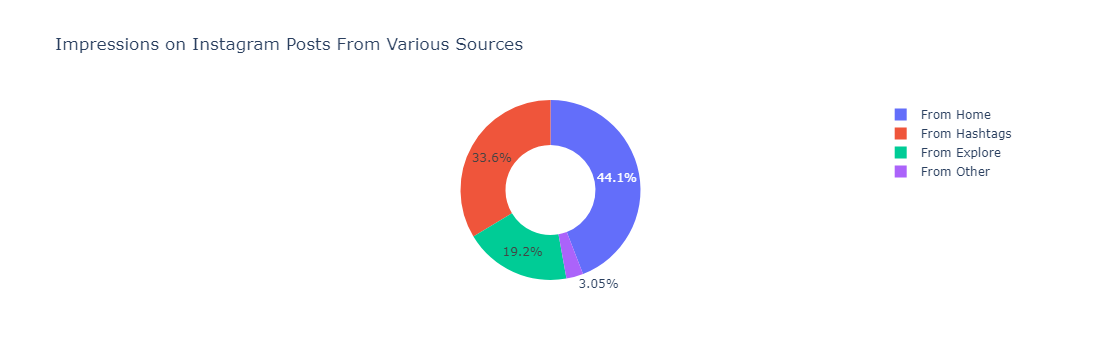

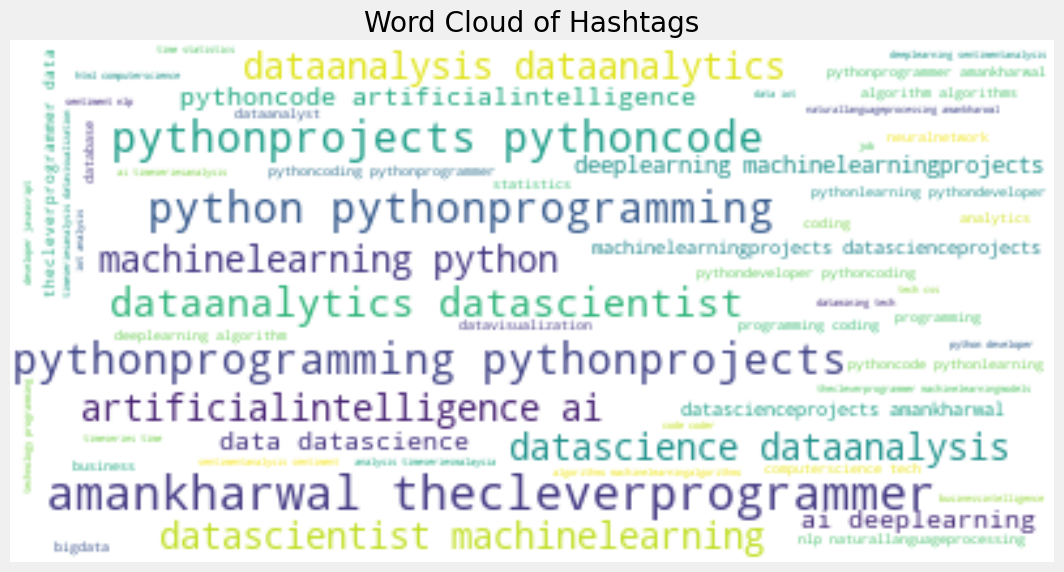

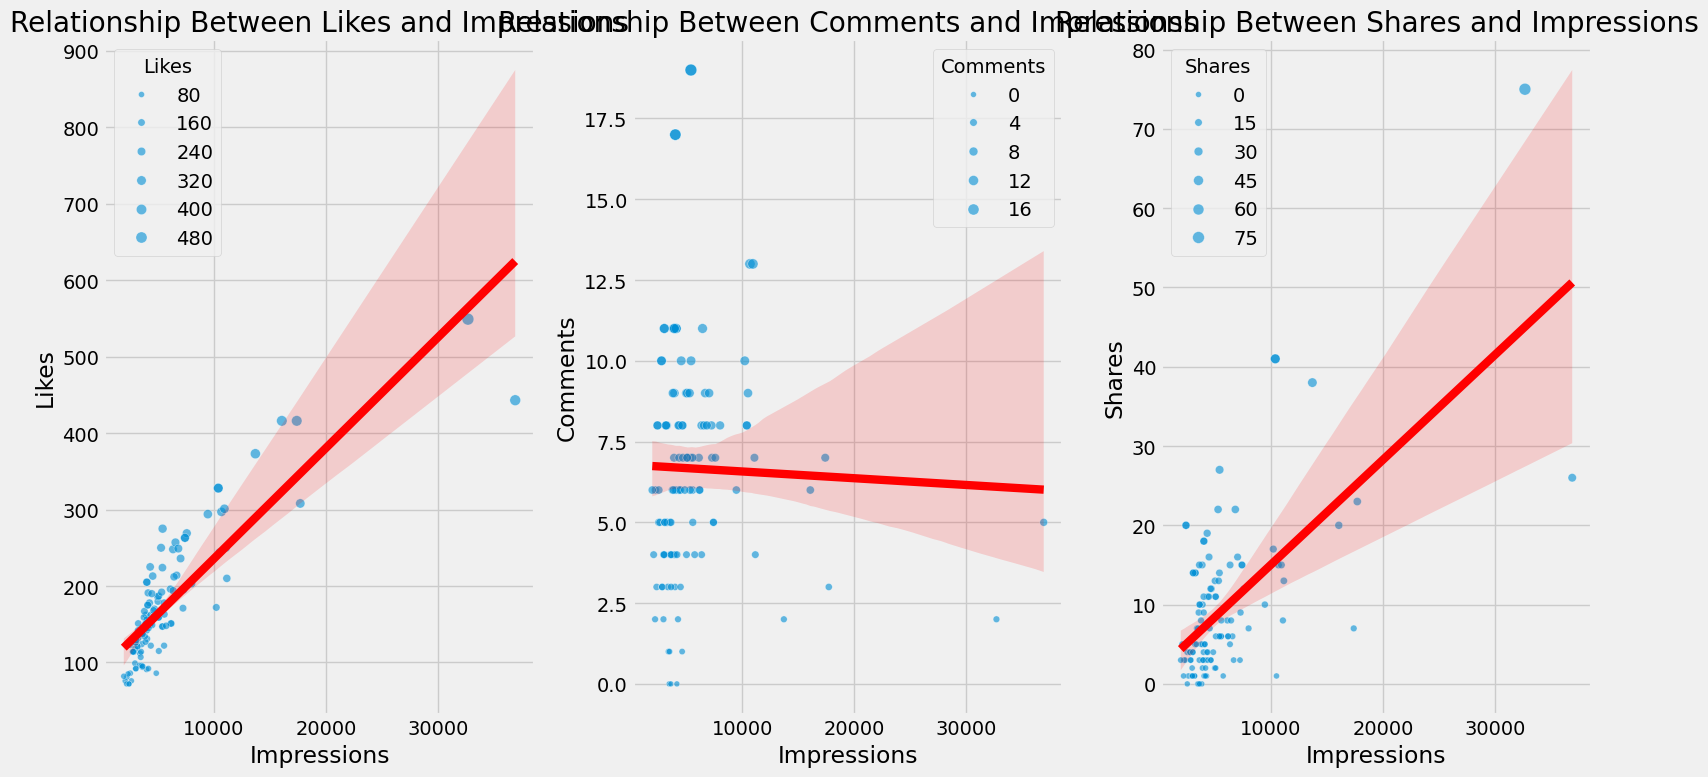

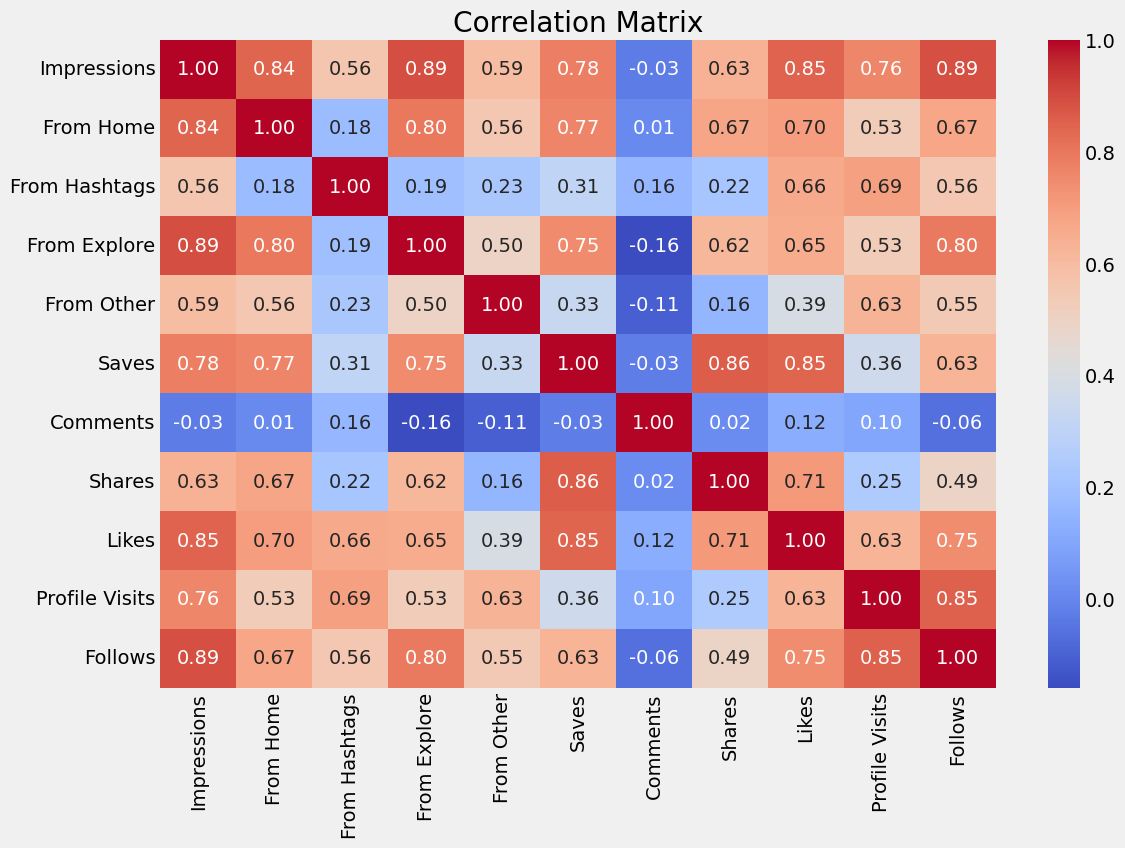

Conversion Rate (Follows / Profile Visits): 41.00%


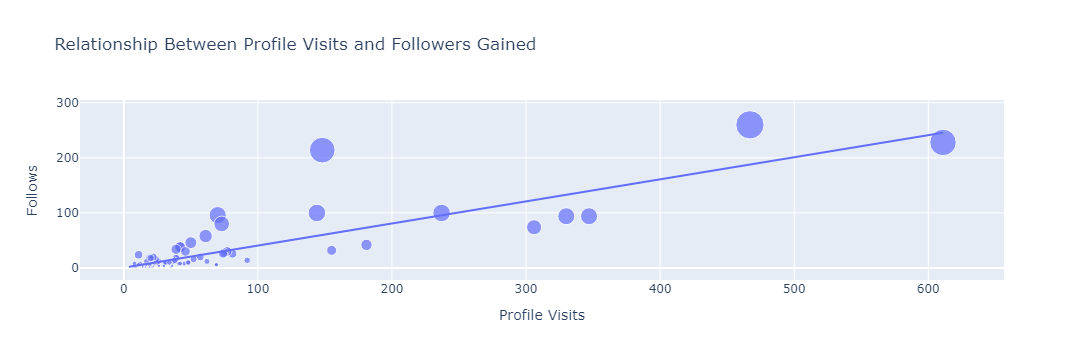

Model training completed. Coefficients: [0.04354822 0.01576422 1.06860812 1.02570285 0.98780284 1.08525931]
Model predictions: [ 5035.9487637   7417.64669375  2398.56350963  4502.38838242
  5600.64293236 33249.40436216  3590.09670942  2305.76101824
 10614.285619    5594.06061511]


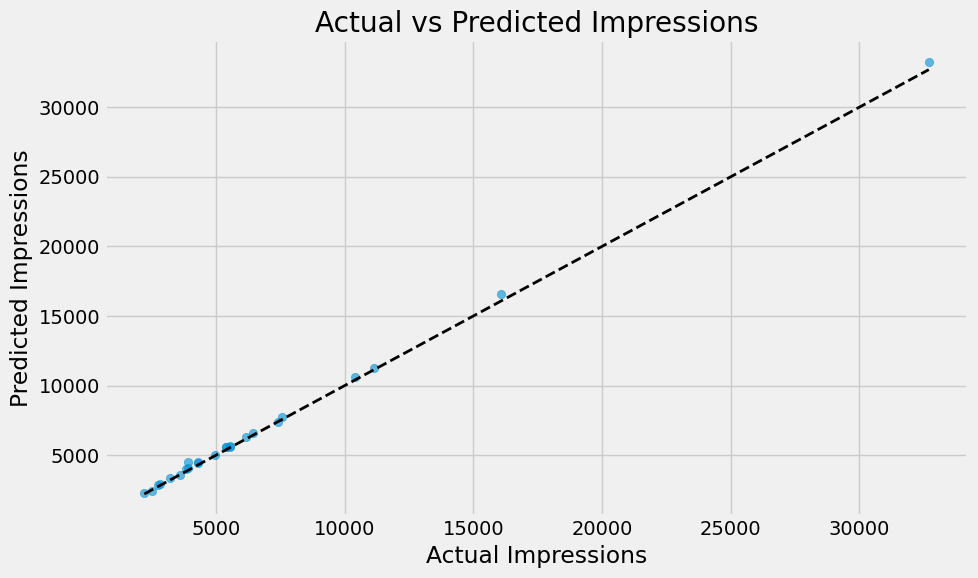

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.impute import SimpleImputer

# Read data with proper encoding handling
data = pd.read_csv("D:/Private Projects/Instagram data.csv", encoding='latin1')

# Check for missing values
print("Missing values summary:")
print(data.isnull().sum())

# Handle missing values by imputing with mean strategy for numerical columns
imputer = SimpleImputer(strategy='mean')
data_numeric = data.select_dtypes(include=[np.number])
data[data_numeric.columns] = imputer.fit_transform(data_numeric)

# Data exploration
print("Data information:")
print(data.info())

# Distribution of impressions from different sources
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.style.use('fivethirtyeight')

# Create a subplot for each source
sns.histplot(data=data, x="From Home", label="Home", bins=30, kde=True)
sns.histplot(data=data, x="From Hashtags", label="Hashtags", bins=30, kde=True)
sns.histplot(data=data, x="From Explore", label="Explore", bins=30, kde=True)
sns.histplot(data=data, x="From Other", label="Other", bins=30, kde=True)

plt.title("Distribution of Impressions From Different Sources")
plt.legend(title="Source")  # Add legend
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust spacing for better readability
plt.show()

# Pie chart for impressions by source
impressions_by_source = data[["From Home", "From Hashtags", "From Explore", "From Other"]].sum()
labels = impressions_by_source.index.to_list()
values = impressions_by_source.to_list()

fig = px.pie(values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

# Word cloud for hashtags
text = " ".join(i for i in data.Hashtags.dropna())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Hashtags")
plt.show()

# Scatter plots with trendlines (consider using subplots for better organization)
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)  # Create a subplot for each scatter plot
sns.scatterplot(x="Impressions", y="Likes", size="Likes", data=data, alpha=0.6)
sns.regplot(x="Impressions", y="Likes", data=data, scatter=False, color='red')
plt.title("Relationship Between Likes and Impressions")

plt.subplot(1, 3, 2)
sns.scatterplot(x="Impressions", y="Comments", size="Comments", data=data, alpha=0.6)
sns.regplot(x="Impressions", y="Comments", data=data, scatter=False, color='red')
plt.title("Relationship Between Comments and Impressions")

plt.subplot(1, 3, 3)
sns.scatterplot(x="Impressions", y="Shares", size="Shares", data=data, alpha=0.6)
sns.regplot(x="Impressions", y="Shares", data=data, scatter=False, color='red')
plt.title("Relationship Between Shares and Impressions")

plt.tight_layout()
plt.show()

# Correlation heatmap
correlation = data.select_dtypes(include=[np.number]).corr()  # Select numerical columns only
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Conversion rate
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(f"Conversion Rate (Follows / Profile Visits): {conversion_rate:.2f}%")

# Scatter plot with trendline for profile visits vs. followers gained
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows", size="Follows", trendline="ols",
                    title="Relationship Between Profile Visits and Followers Gained")
figure.show()

# Feature Engineering: Engagement Rate
data['Engagement Rate'] = (data['Likes'] + data['Comments'] + data['Shares']) / data['Impressions']

# Modeling: Predicting Impressions
features = data[['Profile Visits', 'Follows', 'From Home', 'From Hashtags', 'From Explore', 'From Other']]
target = data['Impressions']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = PassiveAggressiveRegressor(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print(f"Model training completed. Coefficients: {model.coef_}")

# Evaluate model
y_pred = model.predict(X_test)
print(f"Model predictions: {y_pred[:10]}")

# Scatter plot for actual vs predicted impressions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Impressions')
plt.ylabel('Predicted Impressions')
plt.title('Actual vs Predicted Impressions')
plt.tight_layout()
plt.show()
